#### Name: Yashaswini Joshi                   
#### Unique Name: yjoshi

##### 2.1
Tokenize the text (e.g. use the nltk.word tokenize() function in the NLTK package) and compute the frequency of words. Then, plot the frequency distribution of words in each collection after the removal of the stopwords: x-axis - word frequency (number of times a word appears in the collection); y-axis - proportion of words with this frequency. Plot the distributions on a log-log scale. Does each plot look like a power-law distribution? Are the two distributions similar or different?

In [14]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
import string
from nltk import pos_tag

In [25]:
def stop_word(filename):
	with open(filename) as f:
		stopword = dict()
		for line in f:
			line = line.strip('\n')
			words = line.split()
			for word in words:
				word = word.lower()
				if word not in stopword:
					stopword[word] = 1
				else:
					stopword[word] += 1
	return stopword

In [26]:
stop_word = stop_word('stoplist.txt')

In [20]:
def DataLoad(filename):
	with open(filename, encoding="utf8") as f:
		word_dict = dict()
		word_num = 0
		for line in f:
			line = line.strip('\n')
			words = nltk.word_tokenize(line)
			for word in words:
				if word not in string.punctuation:
					word = word.lower()
					word_num += 1
					if word not in word_dict:
						word_dict[word] = 1
					else:
						word_dict[word] += 1
	return word_dict, word_num

In [21]:
wiki_word_dict, wiki_word_num = DataLoad('wiki-bios.10k.txt')

In [22]:
reddit_word_dict, reddit_word_num = DataLoad('reddit-questions.10k.txt')

In [53]:
def Distribution_Word(WordDict, WordNum, stop_word, filename):
	Degree_Num = dict()
	for word, num in WordDict.items():
		if word not in stop_word:
			if num not in Degree_Num:
				Degree_Num[num] = 1
			else:
				Degree_Num[num] += 1
#print(Degree_Num)
	sortList_degree = sorted(Degree_Num.items(), key=lambda kv: kv[0])
	fre_list = []
	degree_list = []
	for pair in sortList_degree:
		degree_list.append(np.log(pair[0]))
		fre_list.append(np.log(float(pair[1])/WordNum))

	plt.plot(degree_list, fre_list, 'o')
	plt.title(filename+"_word_distribution")
	plt.xlabel("Degrees of word(times(log)")
	plt.ylabel("Frequence of word(log)")
	plt.savefig(filename+'Word_distribution.png')
	plt.show()

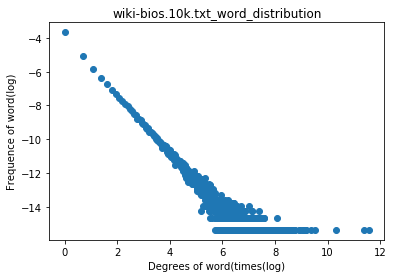

In [27]:
Distribution_Word(wiki_word_dict, wiki_word_num, stop_word, 'wiki-bios.10k.txt')

{9: 117, 21: 32, 1680: 1, 1: 6030, 19: 36, 102: 2, 1138: 1, 469: 1, 7: 182, 2: 1600, 274: 1, 10: 86, 351: 1, 818: 1, 53: 8, 501: 1, 69: 2, 6: 250, 1454: 1, 4: 483, 17: 39, 46: 3, 210: 1, 48: 5, 32: 10, 28: 15, 401: 1, 20: 44, 107: 1, 12: 72, 31: 19, 58: 3, 14: 43, 29: 19, 365: 1, 3: 785, 114: 1, 37: 11, 24: 20, 380: 1, 25: 11, 11: 81, 8: 143, 18: 31, 36: 10, 5: 295, 16: 40, 49: 5, 15: 41, 270: 1, 118: 1, 13: 60, 1145: 1, 113: 1, 110: 2, 42: 7, 770: 1, 54: 6, 101: 3, 62: 4, 131: 1, 44: 7, 123: 2, 45: 8, 200: 1, 26: 15, 82: 2, 119: 1, 185: 1, 88: 1, 245: 1, 35: 11, 146: 1, 853: 1, 60: 3, 39: 9, 61: 5, 22: 21, 55: 4, 56: 7, 27: 11, 414: 1, 170: 2, 109: 2, 92: 1, 57: 8, 75: 3, 76: 1, 80: 4, 133: 1, 38: 8, 33: 12, 23: 14, 40: 3, 186: 1, 43: 7, 121: 1, 306: 1, 144: 2, 30: 5, 112: 1, 148: 1, 71: 2, 68: 1, 116: 1, 67: 2, 34: 6, 203: 1, 207: 1, 307: 1, 312: 1, 130: 1, 84: 2, 103: 2, 66: 2, 72: 2, 50: 6, 250: 1, 251: 1, 378: 1, 360: 1, 227: 1, 147: 1, 77: 1, 157: 1, 65: 1, 166: 1, 41: 5, 51: 2, 

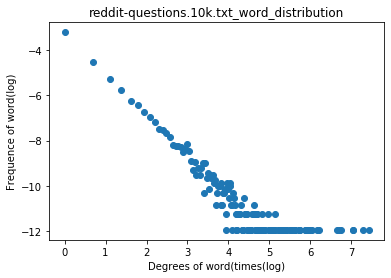

In [54]:
Distribution_Word(reddit_word_dict, reddit_word_num, stop_word, 'reddit-questions.10k.txt')

We can observe from the above plots that both are power-law distribution. Thr distibutions are also similar for both the plots.

##### 2.2
Now compare the two collections more rigorously. Report the following properties of each collection. Can you explain these differences based on the nature of the two collections? (20 points) (You can use the nltk.pos tag() function of the NLTK package or the nlp function from SpaCy for part of speech tagging.)
- a) frequency of stopwords (percentage of the word occurrences that are stopwords.);
- b) percentage of capital letters;
- c) average number of characters per word;
- d) percentage of nouns, adjectives, verbs, adverbs, and pronouns;
- e) the top 10 nouns, top 10 verbs, and top 10 adjectives.

In [29]:
def get_proportion_stopword(word_num, word_dict, stop_word):
	stop_num = 0
	for word, num in word_dict.items():
		# a frequence of stopword
		if word in stop_word:
			stop_num += num
	print("frequency of stopword: " + str(float(stop_num)/word_num))

In [35]:
def get_cap_letters_lenword(filename):
	letter_num = 0
	cap_num = 0
	word_num = 0
	word_total_len = 0
	with open(filename, encoding="utf8") as f:
		for line in f:
			line = line.strip('\n')
			words = nltk.word_tokenize(line)
			for word in words:
				if word not in string.punctuation:
					word_num += 1
					word_total_len += len(word)
					for letter in word:
						letter_num += 1
						if letter.isupper():
							cap_num += 1
	print(filename + ': average of len of word = '+ str(float(word_total_len)/word_num))
	print(filename + ': proportion of cap letters = '+ str(float(cap_num)/letter_num))

In [36]:
def get_tag(filename,stopword):
	with open(filename, encoding="utf8") as f:
		pos_dict = dict()
		noun_dict = dict()
		verb_dict = dict()
		adj_dict = dict()
		tag_list = ['NOUN', "VERB",'ADJ','ADV']
		# percentage of noun, adj, verb, adverb, pornouns
		for line in f:
			line = line.strip('\n')
			words = nltk.word_tokenize(line)
			for word in words:
				if word in string.punctuation:
					words.remove(word)
			for word in words:
				if word in stopword:
					words.remove(word)
			tag_pair = nltk.pos_tag(words, tagset='universal')
			for pair in tag_pair:

				if pair[1] not in pos_dict:
					pos_dict[pair[1]] = 1
				else:
					pos_dict[pair[1]] += 1
				if pair[1] == 'NOUN':
					if pair[0] not in noun_dict:
						noun_dict[pair[0]] = 1
					else:
						noun_dict[pair[0]] += 1
				if pair[1] == 'VERB':
					if pair[0] not in verb_dict:
						verb_dict[pair[0]] = 1
					else:
						verb_dict[pair[0]] += 1
				if pair[1] == 'ADJ':
					if pair[0] not in adj_dict:
						adj_dict[pair[0]] = 1
					else:
						adj_dict[pair[0]] += 1

    
		return [pos_dict, noun_dict, verb_dict, adj_dict]

In [37]:
def get_tag_distribution(filename, word_num,stop_word):
	taglist = get_tag(filename,stop_word)
	pos_dict = taglist[0]
	noun_dict = taglist[1]
	verb_dict = taglist[2]
	adj_dict = taglist[3]
	for tag, num in pos_dict.items():
		print(tag + ": " + str(float(num) / word_num))
	sort_noun = [pair[0] for pair in sorted(noun_dict.items(), key=lambda kv: kv[1], reverse=True)]
	print(sort_noun[:10])
	sort_verb = [pair[0] for pair in sorted(verb_dict.items(), key=lambda kv: kv[1], reverse=True)]
	print(sort_verb[:10])
	sort_adj = [pair[0] for pair in sorted(adj_dict.items(), key=lambda kv: kv[1], reverse=True)]
	print(sort_adj[:10])

In [38]:
def analysis(filename, word_dict,word_num, stop_word ):
	print(filename)
	# a
	get_proportion_stopword(word_num, word_dict, stop_word)
	#b, c
	get_cap_letters_lenword(filename)
	# de
	get_tag_distribution(filename, word_num, stop_word)

In [39]:
analysis('wiki-bios.10k.txt', wiki_word_dict, wiki_word_num, stop_word)

wiki-bios.10k.txt
frequency of stopword: 0.3544670151917948
wiki-bios.10k.txt: average of len of word = 4.838508210692344
wiki-bios.10k.txt: proportion of cap letters = 0.06990628891301624
NOUN: 0.4001511547544848
ADP: 0.020221241376971053
.: 0.048009124404814904
X: 0.0021837940055373945
NUM: 0.06702176374066678
ADJ: 0.053090298535940064
PRON: 0.022622969586730605
VERB: 0.08758898626675317
PRT: 0.008937634353892924
DET: 0.05418442152036667
ADV: 0.014094067864880794
CONJ: 0.0010727111608600346
['*', '==', 'University', 'New', '–', '==References==', 'years', '—', 'time', 'season']
['was', 'born', 'played', 'made', 'won', 'served', 'died', 'had', 'be', 'been']
['first', 'American', 'second', 'former', 'new', 'early', '==External', 'national', 'other', 'final']


In [40]:
analysis('reddit-questions.10k.txt', reddit_word_dict, reddit_word_num, stop_word)

reddit-questions.10k.txt
frequency of stopword: 0.5709427521008403
reddit-questions.10k.txt: average of len of word = 4.222058823529411
reddit-questions.10k.txt: proportion of cap letters = 0.03143193013882669
ADJ: 0.07609637605042016
NOUN: 0.2258140756302521
VERB: 0.1573201155462185
PRON: 0.07957589285714285
DET: 0.03918067226890756
ADV: 0.03801207983193277
NUM: 0.008075105042016808
CONJ: 0.0037289915966386557
ADP: 0.021264443277310925
PRT: 0.00939469537815126
.: 0.007851890756302521
X: 0.0003873424369747899
['Reddit', 'thing', 'people', '’', 'People', 'life', 'time', 'reddit', 'Redditors', 's']
['did', 'have', "'s", '’', 'do', 'is', 'would', 'be', 'are', "'ve"]
['best', 's', 'good', 'Serious', 'favorite', '’', 'most', 'worst', 'weirdest', 'bad']


##### Properties:
- a) Frequency of stopwords: Wiki (0.35) < Reddit (0.57)
-->   Reddits is mostly oral language hence the frequency of stop words are seen more than in Wiki. 

- b) Percentage of capital letters: Wiki (0.069) > Reddit (0.031)
-->   Wikipedia content are written using official language standards and Reddits are where people generlly don't care about using words with Capital letters and following the standards much. Hence Wiki has more percentage of Capital letters.

- c) average number of characters per word: Wiki (4.84) > Reddit (4.22)
-->   As reddits are oral language, hence there are chances that people shorten the word and as Wiki bios are official pages, they do not use so the average number of characters per word will be more for Wiki.

- d) percentage of nouns, adjectives, verbs, adverbs, and pronouns:
    - Wiki: Nouns - 0.4; Adjectives - 0.05; Verbs - 0.08; Adverbs - 0.014; Pronouns - 0.02
    - Reddit: Nouns - 0.22; Adjectives - 0.07; Verbs - 0.15; Adverbs - 0.03; Pronouns - 0.07 
-->   Wiki has more nouns and reddit has more of adjectives, verbs, adverbs, and pronouns. The reason is main difference between professional written english and oral english. 

- d) The top 10 nouns, top 10 verbs, and top 10 adjectives:
    - Wiki:
        - Noun: ['*', '==', 'University', 'New', '–', '==References==', 'years', '—', 'time', 'season']
        - Verb: ['was', 'born', 'played', 'made', 'won', 'served', 'died', 'had', 'be', 'been']
        - Adjective: ['first', 'American', 'second', 'former', 'new', 'early', '==External', 'national', 'other', 'final']
    - Reddit:
        - Noun: ['Reddit', 'thing', 'people', '’', 'People', 'life', 'time', 'reddit', 'Redditors', 's']
        - Verb: ['did', 'have', "'s", '’', 'do', 'is', 'would', 'be', 'are', "'ve"]  
        - Adjective: ['best', 's', 'good', 'Serious', 'favorite', '’', 'most', 'worst', 'weirdest', 'bad']

##### 2.3
We would like to summarize each document with a few words. However, picking the most frequently used words in each document would be a bad idea, since they are more likely to appear in other document as well. Instead, we pick the words
with the highest TF-IDF weights in each document. In this problem, term frequency (TF) and inverse document frequency (IDF) are defined as:
TF(t; d) = log(c(t; d) + 1)IDF(t) = 1 + log(N=k):
c(t; d) is the frequency count of term t in doc d, N is the total number of documents in the collection, and k is the document frequency of term t in the collection.For each of the first 10 documents in the Wikipedia biographies collection, print out the 5 words that have the highest TF-IDF weights.

In [41]:
def TFIDF(collocation,stop_word):
	N = 0
	with open(collocation, encoding="utf8") as f:
		doc_index = 0
		tuple_list = list()
		for doc in f:
			doc_len = 0
			N+=1
			word_dict = dict()
			doc = doc.strip('\n')
			words = nltk.word_tokenize(doc)
			for word in words:
				word = word.lower()
				if word not in string.punctuation and word not in word_dict and word not in stop_word:
					word_dict[word] = 1
					doc_len += 1
				elif word not in string.punctuation and word not in stop_word:
					word_dict[word] += 1
					doc_len += 1
			for word, count in word_dict.items():
				tuple_list.append((doc_index, word, np.log(float(count) + 1)))
			doc_index += 1

	word_sort = sorted(tuple_list, key=lambda pair: pair[1])
	word_doc = dict()


	for pair in word_sort:
		if pair[1] not in word_doc:
			doc_list = []
			doc_list.append(pair[0])
			word_doc[pair[1]] = doc_list
		else:
			doc_list = word_doc[pair[1]]
			doc_list.append(pair[0])
			word_doc[pair[1]] = doc_list
	# this is IDF
	for word, doc_list in word_doc.items():
		doc_len = len(set(doc_list))
		word_doc[word] = 1 + np.log(float(N)/doc_len)


	TF_IDF_doc = dict()
	for doc_index in range(10):
		TF_IDF_list = list()
		for pair in tuple_list:
			if pair[0] == doc_index:
				TF_IDF_list.append((pair[0], pair[1], pair[2] * word_doc[pair[1]]))
		TF_IDF_doc[doc_index] = TF_IDF_list

	for doc, tuple in TF_IDF_doc.items():
		print('doc' + str(doc))
		top5_list = sorted(tuple, key=lambda x: x[2], reverse=True)[:5]
		print([pair[1] for pair in top5_list])

In [42]:
TFIDF('wiki-bios.10k.txt',stop_word)

doc0
['szilard', 'fermi', 'neutrons', 'uranium', 'fission']
doc1
['corson', 'belles', 'cordier', 'thionville', 'respire']
doc2
['al-hilal', 'britos', '0', 'uruguayan', 'mx']
doc3
['1530', 'exeter', 'laurence', '1532', '1543']
doc4
['eaton', 'revill', 'uncredited', 'forsyte', 'taos']
doc5
['fusc', 'bois-guillaume', 'sierra', 'zombo', 'freetown']
doc6
['gaete', 'schwager', 'chilena', 'eliseo', 'concepción']
doc7
['korea', 'tok-hun', 'dprk-south', '김덕훈', 'politburo']
doc8
['jamet', 'sauveur', 'beatification', 'pierre-françois', 'approved']
doc9
['amevor', 'middle-distance', 'ghanaian', '1500', 'runner']


#### 2.4
As discussed in the class, TF-IDF is a common way to weight the terms in each document. It can also be easily calculated from the inverted index, since TF can be obtained from the postings and IDF can be summarized as a dictionary. Could
you think of another weighting that cannot be calculated directly from inverted index? What is the advantage of such a weighting?

Answer: We can categorise each word of the document into different categories. We can use theme vector to represent documents and for quesry we can use vectors. This can also be weighed for ranking purpose. But we may have to normalise each catergories when we divide each word into different categories.